# EDA

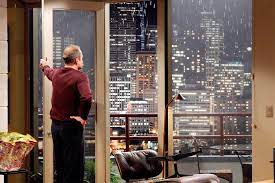

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#importing data from data folder into dataframe

df = pd.read_csv("data/King_County_House_prices_dataset.csv")

**Understanding the Data set**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

1.There are 21597 entries     
2.there are *8* columns with **'float'** data type     
3.*11* columns with **'int'** data type   
4.and 2 with 'object' type.      
5.Date will be converted into datetime data type later

In [4]:
#loook first 5 rows of data

df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


1. The average house price in king county is **540296.574**.  
2. The maximum number of bedrooms are ***33*** and average is ***3.3***.  
3. The housses have atleast **1** bedroom and **0.5** bathroom.  
4. The average bedroom is **3.3** and max **33**, which means there are many outliers.

#### Data cleaning

In [7]:
#check for missing values

df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

This shows that column:  
1. **Waterfront** has 2376 missing values(NaN),  
2. **yr_renovated** has 3842   
3. **view** has 63 missing values

In [56]:
#dropping rows with Nans in Yr_renovated column

df = df.dropna(subset = ['yr_renovated'])

In [9]:
# removing rows with ? values in sqft_basement column

df.convert_dtypes().dtypes  
pd.to_numeric(df['sqft_basement'], errors='coerce').convert_dtypes() 

0           0
1         400
3         910
4           0
5        1530
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: sqft_basement, Length: 17755, dtype: Int64

In [10]:
df = df[df.sqft_basement != '?']

In [11]:
df.shape

(17389, 21)

Now the data set has only **17389** entries, after cleaning

In [12]:
df.groupby(['sqft_basement']).count()['id']

# There are now no rows with '?' entry in sqft_basement column

sqft_basement
0.0       10546
10.0          2
100.0        37
1000.0      120
1008.0        1
          ...  
950.0        50
960.0        54
970.0        31
980.0        45
990.0        44
Name: id, Length: 286, dtype: int64

### Descriptive Statistics

In [13]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

df_1 = df.drop(columns = ['id', 'date', 'lat','long', 'zipcode','waterfront','view','zip_type'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_1.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_1[column])
    plt.xlabel(column)
    x+=1
plt.tight_layout
plt.show()


KeyError: "['zip_type'] not found in axis"

In [57]:
df['yr_renovated'].value_counts()

## most of the houses in this dataset never been renovated 

0.000       16666
2014.000       69
2003.000       31
2013.000       31
2007.000       30
            ...  
1959.000        1
1951.000        1
1976.000        1
1953.000        1
1948.000        1
Name: yr_renovated, Length: 69, dtype: int64

In [60]:
#binning price columns

bin_price =[0,250000,500000,750000, 1000000, 2000000, df['price'].max()]
label_price = ['0-250k', '250k-500k', '500k-750k','750k-1mil','1-2mil', '> 2 mil']

df['price_group'] = pd.cut(df['price'], bins = bin_price, labels = label_price)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,zip_type,year_sold,month_sold,weekday_sold,day_sold,price_group
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,47.511,-122.257,1340,5650,country_side,2014,10,0,13,0-250k
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,47.721,-122.319,1690,7639,city_centre,2014,12,1,9,500k-750k
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,47.521,-122.393,1360,5000,city_centre,2014,12,1,9,500k-750k
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,47.617,-122.045,1800,7503,country_side,2015,2,2,18,500k-750k
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,47.656,-122.005,4760,101930,country_side,2014,5,0,12,1-2mil


In [65]:
df['price_group'].value_counts()

# Most of the houses have price group 250 - 500k

250k-500k    8152
500k-750k    4409
0-250k       1935
750k-1mil    1720
1-2mil       1014
> 2 mil       159
Name: price_group, dtype: int64

In [14]:
df.groupby(["condition"]).count()['id']

condition
1       22
2      140
3    11292
4     4546
5     1389
Name: id, dtype: int64

In [15]:
df.groupby(['bedrooms']).count()['id']

bedrooms
1      157
2     2195
3     7894
4     5585
5     1286
6      225
7       25
8       11
9        6
10       3
11       1
33       1
Name: id, dtype: int64

In [16]:
df.groupby(['bathrooms']).count()['id']

bathrooms
0.500       3
0.750      56
1.000    3051
1.250       7
1.500    1169
1.750    2446
2.000    1528
2.250    1688
2.500    4359
2.750     950
3.000     604
3.250     477
3.500     604
3.750     119
4.000     112
4.250      67
4.500      80
4.750      18
5.000      16
5.250      13
5.500       7
5.750       3
6.000       6
6.500       1
6.750       1
7.500       1
7.750       1
8.000       2
Name: id, dtype: int64

In [17]:
df['zipcode'].nunique()

70

In [18]:
df.groupby(['zipcode']).count()['id']

zipcode
98001    278
98002    164
98003    236
98004    261
98005    137
        ... 
98177    203
98178    209
98188    109
98198    230
98199    255
Name: id, Length: 70, dtype: int64

In [19]:
# top 10 zipcodes with maximum house sold

df.groupby(['zipcode']).count()['id'].sort_values(ascending=False)[0:10]



zipcode
98038    481
98103    469
98052    459
98042    459
98115    450
98117    441
98034    437
98118    416
98023    406
98006    403
Name: id, dtype: int64

In [20]:
# Top 5 Zipcodes with maximum Average Price

pd.crosstab(index = df['zipcode'], columns = 'Average_Price', values = df['price'], aggfunc = 'mean').sort_values('Average_Price',ascending = False).head(5)


#Zipcode 98039 has maximum average price

col_0,Average_Price
zipcode,
98039,2179038.462
98004,1348355.575
98040,1203423.586
98112,1112683.150
98102,948195.863


### Hypothesis

**william Rodriguez**: 2 people, country (best timing & non-renovated) & city house (fast & central location), wants two houses

**William Requirement:**   
    1. there are only 2 people and no kids.  
    2. one in country side(best timing and non-renovated)  
    3. one in city centre( fast and central location)

Hypothesis based on william requirements:  
    1. houses in city centre are expensive than houses on country side.   
    2. house price are dependent on timing of the year   
    3. prices are dependent on no. of bedrooms and bathrooms 
    

### Hypothesis 1

##### 1. houses in city centre are expensive than houses on country side

In [21]:
df['zipcode'].unique()

array([98178, 98125, 98136, 98074, 98053, 98198, 98146, 98038, 98007,
       98115, 98107, 98126, 98019, 98103, 98003, 98133, 98040, 98092,
       98030, 98002, 98112, 98052, 98027, 98117, 98058, 98001, 98056,
       98166, 98119, 98023, 98070, 98148, 98105, 98042, 98059, 98122,
       98144, 98004, 98005, 98034, 98075, 98118, 98199, 98032, 98045,
       98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109,
       98022, 98033, 98155, 98024, 98011, 98031, 98010, 98106, 98028,
       98072, 98188, 98014, 98116, 98008, 98055, 98039])

In [70]:
df['zipcode'].nunique()

70

#### following zip codes are considered as city centre:
98101 98144 98121            
98102 98112 98122     
98103 98134 98174           
98104 98125 98136             
98105 98115 98126  98164                      
98106 98116 98154
98107 98117 98133
98108 98118 98199
98109 98119 98195


In [ ]:
#df.loc[df['zipcode'].isin([98101,98121,98154,98102,98112,98122,98133,98144,98164,98103,98134,98174,98104,98125,98136,98195,98105,98115,98126,98199,98106,98116,98107,98117,98108,98118,98109,98119])]

In [23]:
# Create column with zip type: city centre and country side

zip_type = []
for x in df['zipcode']:
    if (x==98101) or (x==98102) or(x==98103) or (x==98104) or (x==98105) or (x==98107) or (x==98106) or (x==98108) or (x==98109) or (x==98144) or (x==98112) or (x==98134) or (x==98125) or (x==98115) or (x==98116) or (x==98117) or (x==98118) or (x==98119) or (x==98121) or (x==98122) or (x==98174) or (x==98136) or (x==98126) or (x==98154) or (x==98133) or (x==98199) or (x==98195) or (x==98164):
        zip_type.append('city_centre')
        
    else:
        zip_type.append('country_side')
        
df['zip_type'] = zip_type

In [26]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_type
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,country_side
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,city_centre
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,city_centre


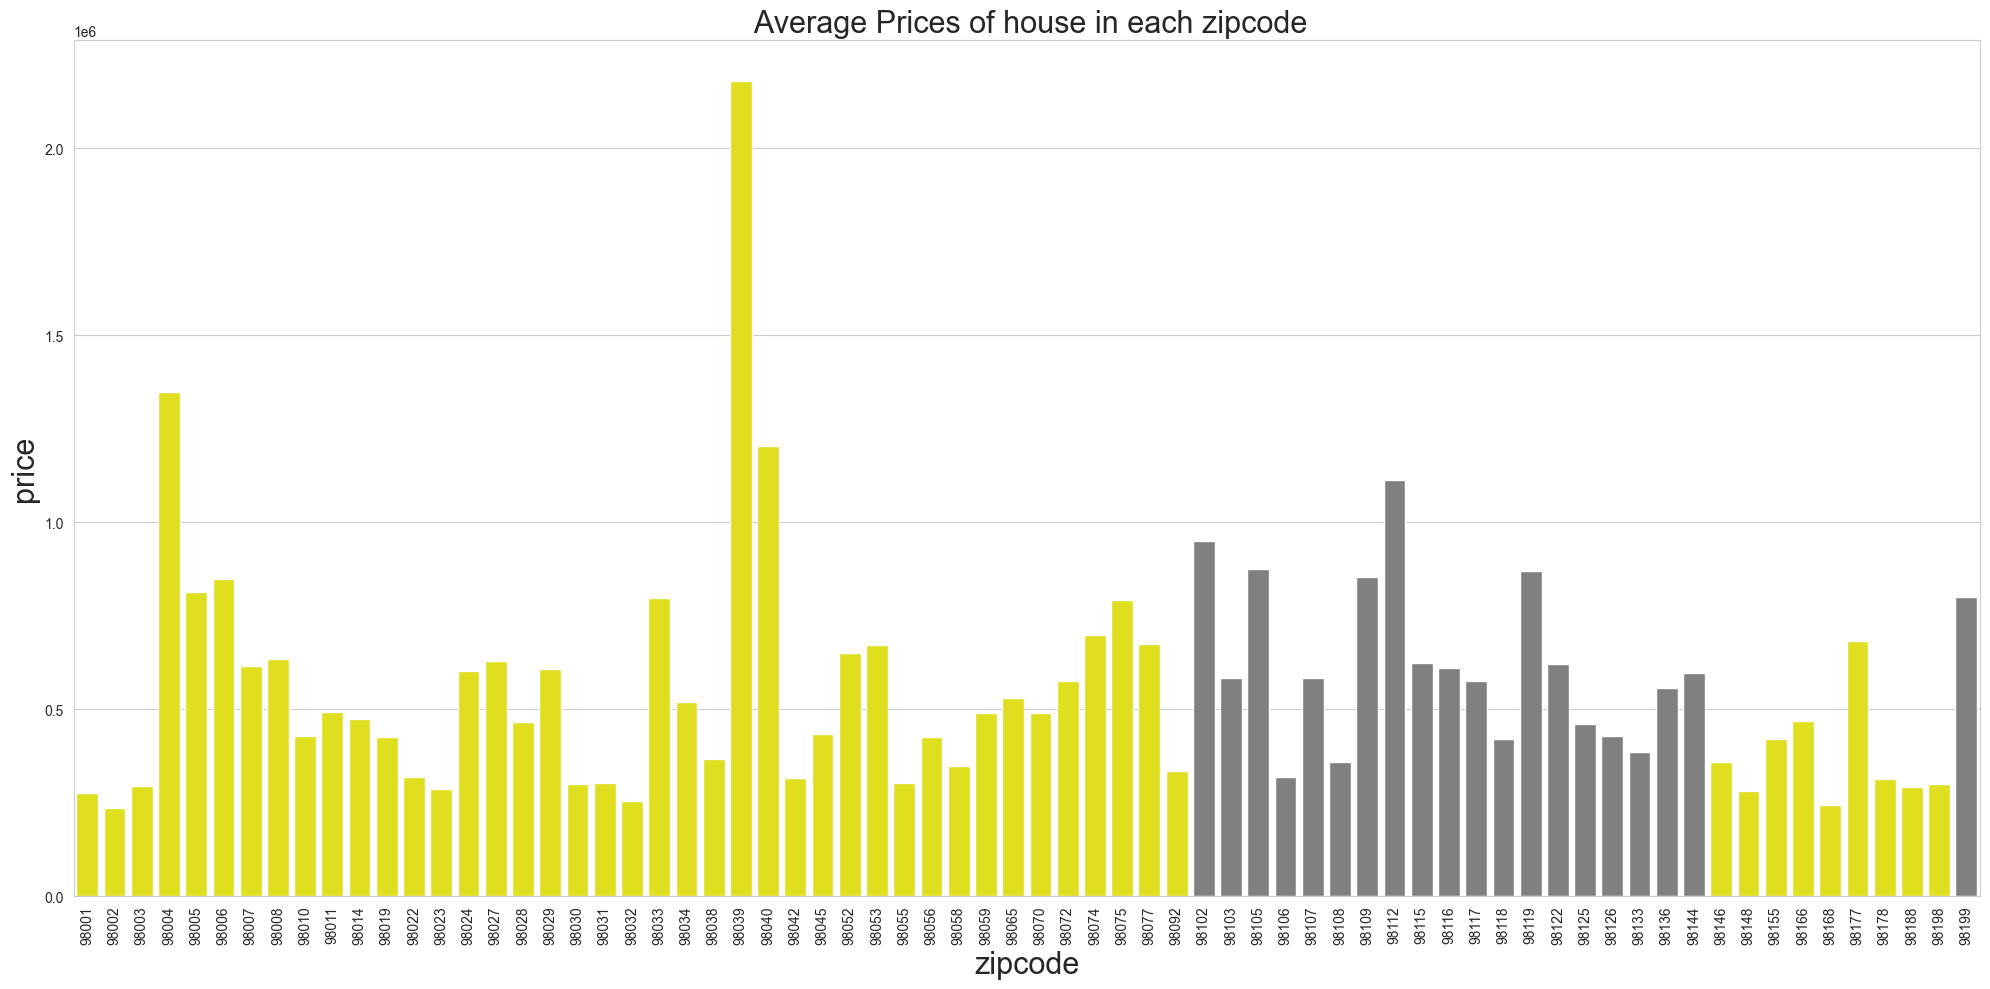

In [69]:
#Plotting zipcodes with average Price using seaborn

plt.figure(figsize = (20, 10))

clrs = ['grey' if (x == 'city_centre') else 'yellow' for x in df[["zipcode", "zip_type"]].groupby("zipcode").agg(pd.Series.mode).reset_index()['zip_type']]
sns.barplot(x = 'zipcode', y= 'price', data = df,palette=clrs, ci = False)
plt.xlabel("zipcode", fontsize = 22)
plt.ylabel("price", fontsize = 22)
plt.title(' Average Prices of house in each zipcode',fontsize = 22)
plt.xticks(rotation = 90)
plt.tight_layout()


(array([0, 1]), [Text(0, 0, 'country_side'), Text(1, 0, 'city_centre')])

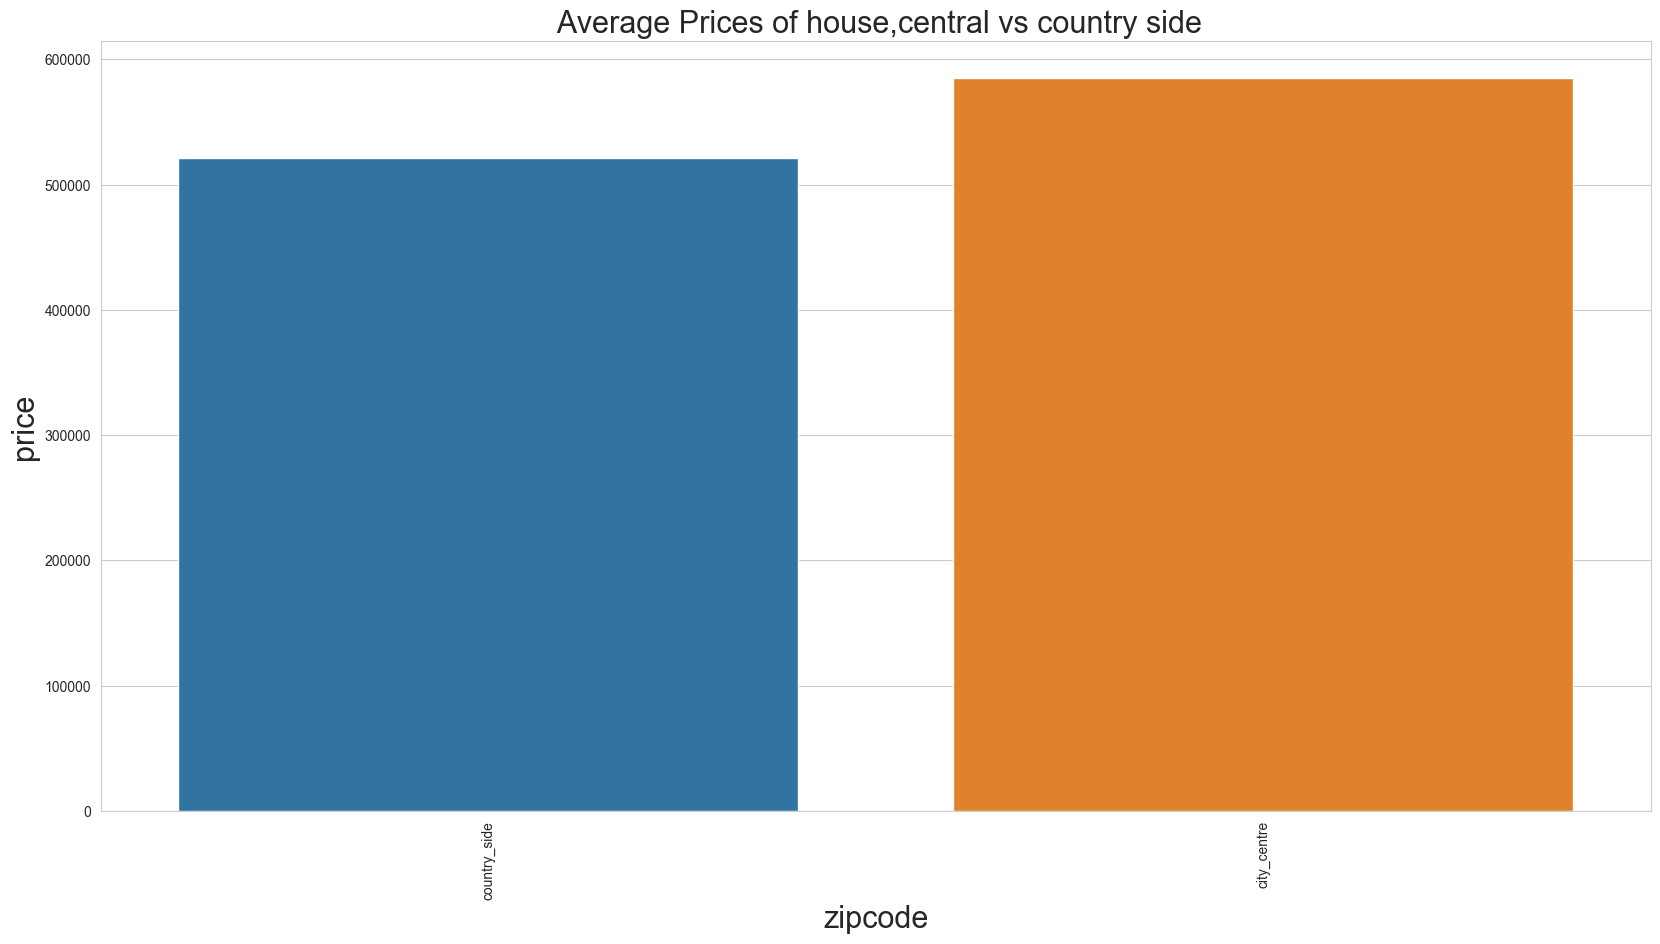

In [71]:
# Plotting  average price bar city houses VS Cuntry house

plt.figure(figsize = (20, 10))
#plt.bar(df['zipcode'], df['price']);
sns.barplot(x = 'zip_type', y= 'price', data = df,ci = False)
plt.xlabel("zipcode", fontsize = 22)
plt.ylabel("price", fontsize = 22)
plt.title(' Average Prices of house,central vs country side',fontsize = 22)
plt.xticks(rotation = 90)

In [27]:
pd.crosstab(index = df['zipcode'], columns = 'Average_Price', values = df['price'],aggfunc = 'mean').sort_values('Average_Price',ascending = False).head(10)

col_0,Average_Price
zipcode,
98039,2179038.462
98004,1348355.575
98040,1203423.586
98112,1112683.150
98102,948195.863
98105,874589.530
98119,868948.427
98109,854349.128
98006,846766.439


#### Hypothesis1- result: Price of houses in city_centre are higher than houses in country side

#### Hypothesis 2

##### 'Price is dependent on the timing of the year'

In [28]:
#convert dates to datetime dtype
df['date'] = pd.to_datetime(df['date'])

In [29]:
#creating new columns

df['year_sold'] = df.date.dt.year
df['month_sold'] = df.date.dt.month
df['weekday_sold'] = df.date.dt.weekday
df['day_sold'] = df.date.dt.day


In [30]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,zip_type,year_sold,month_sold,weekday_sold,day_sold
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,98178,47.511,-122.257,1340,5650,country_side,2014,10,0,13
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,98125,47.721,-122.319,1690,7639,city_centre,2014,12,1,9
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,98136,47.521,-122.393,1360,5000,city_centre,2014,12,1,9


In [31]:
#montly mean price in ascending order

df.groupby('month_sold').mean().sort_values('price')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,weekday_sold,day_sold
month_sold,,,,,,,,,,,,,,,,,,,,,
2,4556636662.949,503180.202,3.356,2.045,2004.840,13221.232,1.457,0.005,0.251,3.415,...,1970.870,54.724,98077.047,47.546,-122.217,1941.154,10983.707,2015.000,2.174,15.869
11,4527756612.034,525146.946,3.340,2.083,2053.120,15889.754,1.497,0.013,0.232,3.414,...,1969.708,75.032,98077.493,47.556,-122.217,1947.939,13193.177,2014.000,1.928,14.055
1,4616683058.205,527648.110,3.402,2.139,2097.091,17093.048,1.479,0.008,0.233,3.360,...,1971.805,68.988,98077.604,47.552,-122.213,1975.699,12569.670,2015.000,2.166,16.721
12,4572394661.565,528009.116,3.398,2.112,2101.556,15786.179,1.494,0.010,0.232,3.399,...,1971.250,74.391,98077.579,47.560,-122.222,1982.745,12961.872,2014.000,1.736,13.343
9,4421021216.718,531509.856,3.361,2.139,2082.927,15375.786,1.491,0.006,0.246,3.420,...,1970.639,102.427,98077.868,47.562,-122.215,1991.103,12005.401,2014.000,1.988,15.547
8,4620258232.343,535662.289,3.374,2.131,2094.145,14159.606,1.505,0.006,0.213,3.431,...,1972.648,79.525,98076.596,47.565,-122.208,1998.848,12542.892,2014.000,1.992,15.839
10,4616414814.644,538610.118,3.351,2.132,2085.007,15603.844,1.507,0.009,0.237,3.407,...,1970.331,91.143,98079.321,47.562,-122.218,1977.190,13024.447,2014.000,2.087,16.604
7,4573615918.820,541622.044,3.384,2.145,2120.980,14519.525,1.519,0.007,0.218,3.444,...,1972.036,88.992,98073.862,47.556,-122.203,2031.388,13118.852,2014.000,1.880,16.436
5,4627873952.935,546866.766,3.361,2.113,2085.486,17040.250,1.478,0.004,0.229,3.430,...,1969.933,104.054,98079.031,47.564,-122.215,1985.965,13743.109,2014.271,2.150,14.051


In [32]:
df_1 = df.groupby('month_sold').mean()- df.price.mean()
df_1.sort_values('price')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,weekday_sold,day_sold
month_sold,,,,,,,,,,,,,,,,,,,,,
2,4556095720.327,-37762.420,-540939.266,-540940.577,-538937.781,-527721.390,-540941.165,-540942.617,-540942.371,-540939.207,...,-538971.752,-540887.898,-442865.575,-540895.076,-541064.839,-539001.467,-529958.915,-538927.622,-540940.448,-540926.753
11,4527215669.412,-15795.676,-540939.282,-540940.539,-538889.502,-525052.868,-540941.125,-540942.609,-540942.390,-540939.208,...,-538972.914,-540867.590,-442865.129,-540895.065,-541064.839,-538994.683,-527749.445,-538928.622,-540940.694,-540928.567
1,4616142115.583,-13294.512,-540939.220,-540940.482,-538845.531,-523849.574,-540941.143,-540942.613,-540942.389,-540939.262,...,-538970.817,-540873.634,-442865.018,-540895.069,-541064.834,-538966.923,-528372.952,-538927.622,-540940.455,-540925.900
12,4571853718.943,-12933.506,-540939.224,-540940.510,-538841.066,-525156.442,-540941.128,-540942.611,-540942.390,-540939.223,...,-538971.372,-540868.231,-442865.043,-540895.062,-541064.843,-538959.876,-527980.750,-538928.622,-540940.886,-540929.279
9,4420480274.096,-9432.766,-540939.261,-540940.483,-538859.695,-525566.836,-540941.131,-540942.615,-540942.376,-540939.202,...,-538971.983,-540840.195,-442864.754,-540895.060,-541064.837,-538951.519,-528937.221,-538928.622,-540940.634,-540927.075
8,4619717289.721,-5280.333,-540939.248,-540940.490,-538848.477,-526783.016,-540941.117,-540942.616,-540942.409,-540939.191,...,-538969.974,-540863.097,-442866.026,-540895.057,-541064.830,-538943.774,-528399.730,-538928.622,-540940.630,-540926.782
10,4615873872.022,-2332.504,-540939.271,-540940.490,-538857.615,-525338.778,-540941.115,-540942.613,-540942.385,-540939.215,...,-538972.290,-540851.479,-442863.301,-540895.060,-541064.840,-538965.432,-527918.175,-538928.622,-540940.534,-540926.017
7,4573074976.198,679.422,-540939.237,-540940.477,-538821.642,-526423.096,-540941.103,-540942.614,-540942.404,-540939.178,...,-538970.586,-540853.630,-442868.759,-540895.065,-541064.825,-538911.233,-527823.770,-538928.622,-540940.742,-540926.186
5,4627333010.313,5924.144,-540939.260,-540940.508,-538857.135,-523902.372,-540941.144,-540942.618,-540942.393,-540939.192,...,-538972.689,-540838.568,-442863.591,-540895.058,-541064.837,-538956.657,-527199.513,-538928.351,-540940.472,-540928.571


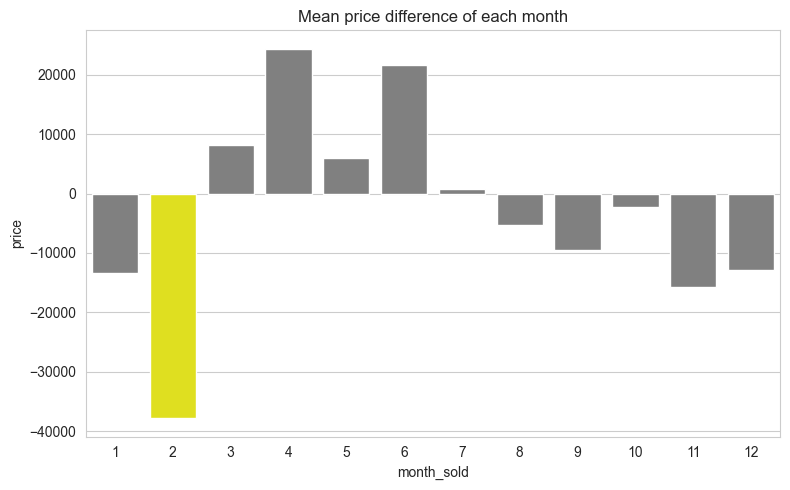

In [33]:
sns.set_style('whitegrid') #set plot style
fig, ax = plt.subplots()

clrs = ['grey' if (x > df_1['price'].min()) else 'yellow' for x in df_1['price'] ]
sns.barplot(data=df_1, x=df_1.index, y=df_1['price'], palette=clrs) 
plt.title('Mean price difference of each month')

plt.tight_layout()
plt.show()


#February is the bestmonth to buy houses in King county
#Because it has difference of more than 30,000 from mean price of house.
#it prove the hypothesis 2, as it shows that house prices are dependent on time of the year

#### Hypothesis2- result: Price of houses are dependent on time of the year

#### Hypothesis 3

##### 3. prices are dependent on no. of bedrooms and bathrooms 

In [34]:
df.shape

(17389, 26)

In [35]:
df['bedrooms'].value_counts()

#out of 21597 entries,9824 houses have 3 bedrooms
#

3     7894
4     5585
2     2195
5     1286
6      225
1      157
7       25
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [36]:
df['bathrooms'].value_counts()

2.500    4359
1.000    3051
1.750    2446
2.250    1688
2.000    1528
1.500    1169
2.750     950
3.000     604
3.500     604
3.250     477
3.750     119
4.000     112
4.500      80
4.250      67
0.750      56
4.750      18
5.000      16
5.250      13
1.250       7
5.500       7
6.000       6
0.500       3
5.750       3
8.000       2
6.750       1
7.500       1
7.750       1
6.500       1
Name: bathrooms, dtype: int64

In [53]:
df_new1 = df.groupby(['bedrooms']).mean()['price']
df_new1.max()

1213272.7272727273

In [49]:
df_new = df.groupby(['bathrooms']).mean()['price']


Text(0.5, 1.0, 'Average Prices Per Number of Bathrooms')

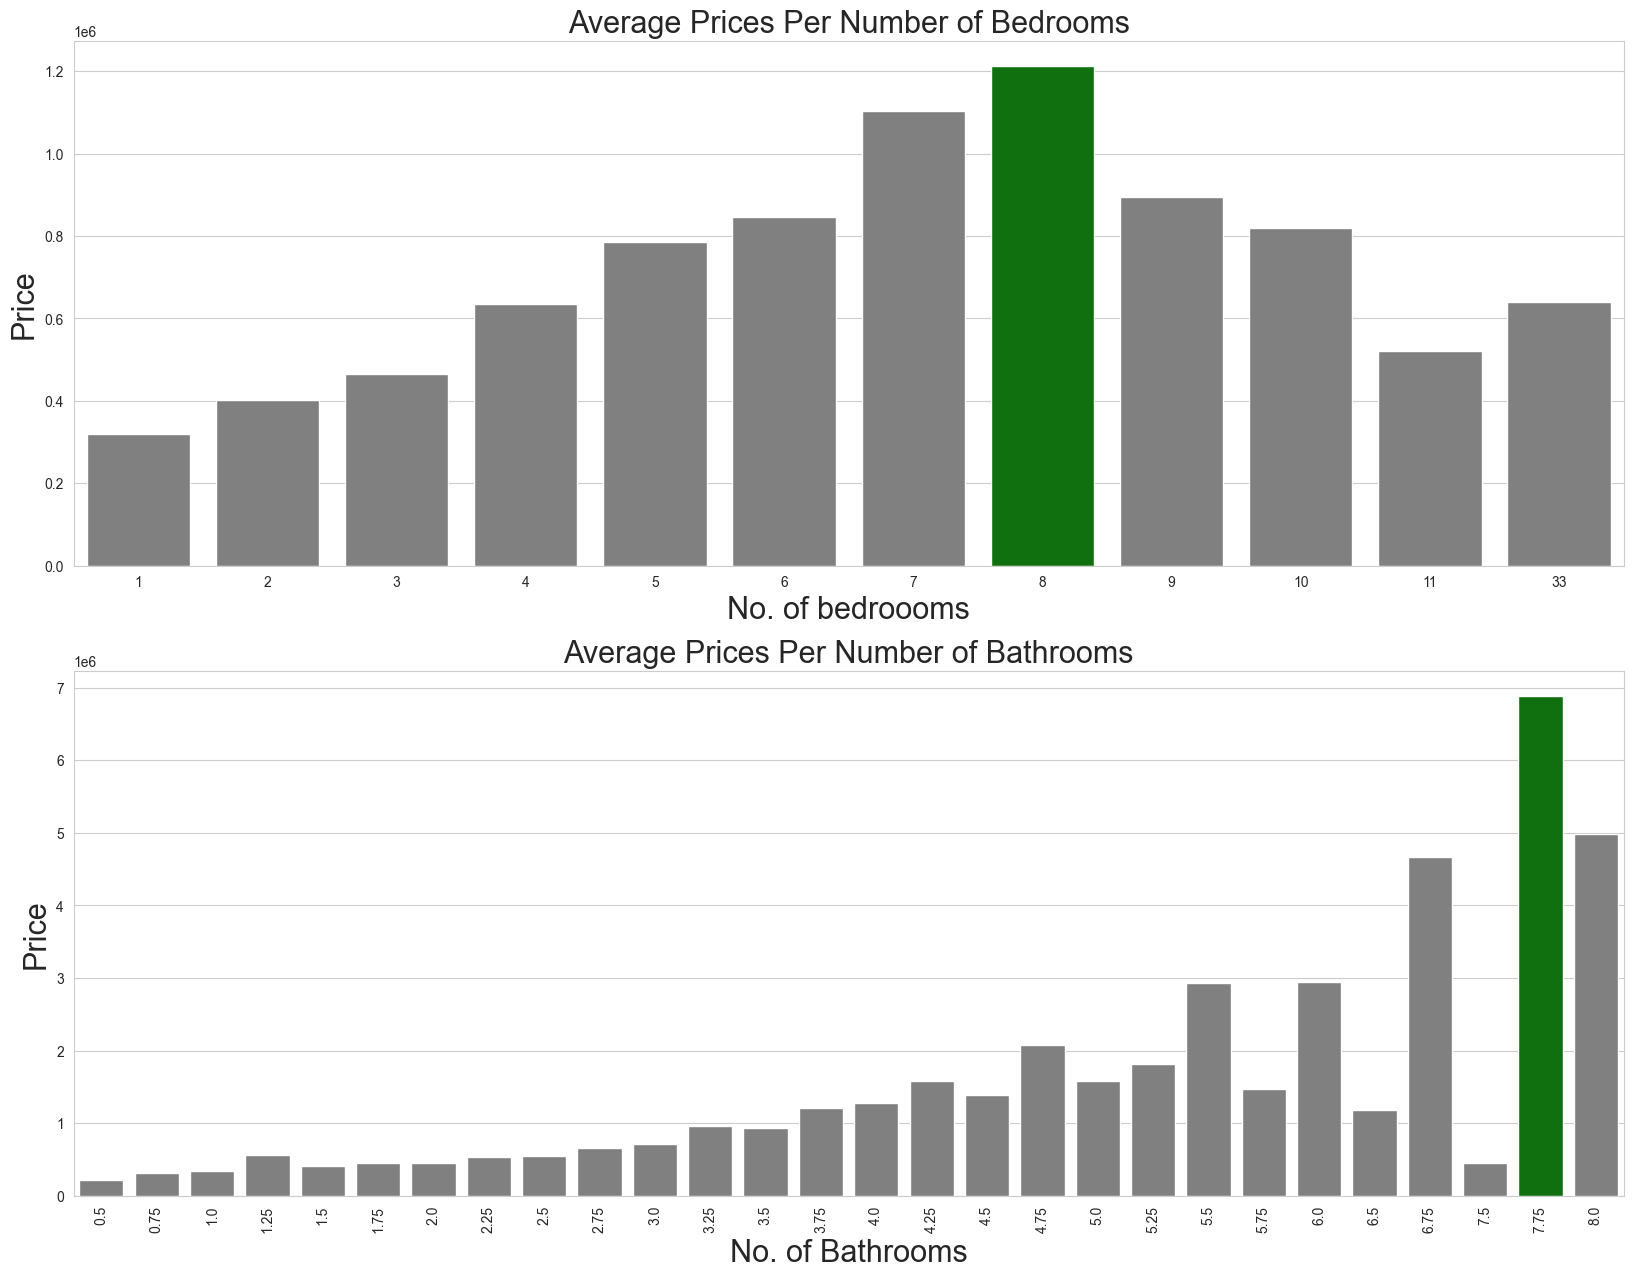

In [55]:
plt.figure(figsize = (20, 15))
plt.subplot(2,1,1)
clrs = ['grey' if (x < 1213272.7272727273) else 'green' for x in df_new1]
sns.barplot(x = 'bedrooms', y='price', data = df, ci = False, palette = clrs)
plt.xlabel('No. of bedroooms',fontsize=22)
plt.ylabel('Price',fontsize=22)
plt.title('Average Prices Per Number of Bedrooms',fontsize=22)

plt.subplot(2,1,2)
clrs = ['grey' if (x < 6890000.0) else 'green' for x in df_new]
sns.barplot(x = 'bathrooms', y='price', data = df, ci = False, palette= clrs)
plt.ylabel('Price',fontsize=22)
plt.xlabel('No. of Bathrooms',fontsize=22)
plt.xticks(rotation = 90)
plt.title('Average Prices Per Number of Bathrooms',fontsize=22)



# House with 8 bedrooms is the most expensive house in average 
# numbers of bathrooms somewhat have a positive correlation with the average price of the houses price 
# Houses with 7.5 no. of bathrooms seems ne have lowest average price.

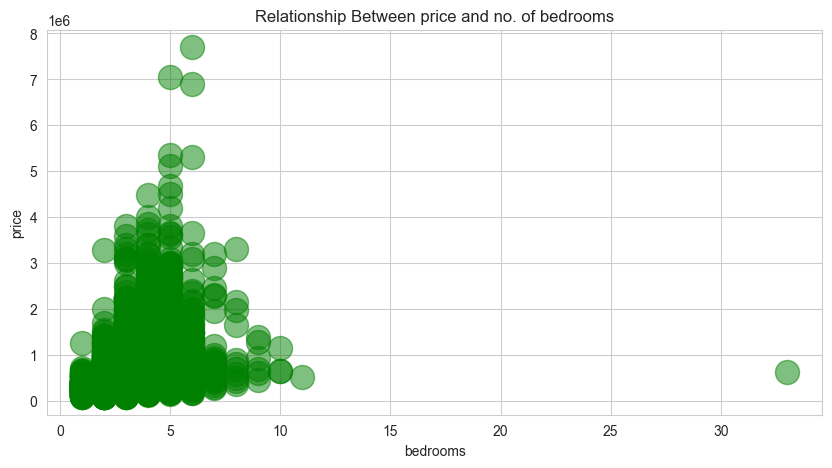

In [75]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('bedrooms')
ax1.set_ylabel('price')
ax1.set_title('Relationship Between price and no. of bedrooms')

# Set the color inside the scatter method and adjust the 'alpha' to allow transparancy
plt.scatter(df['bedrooms'], 
            df['price'], 
            s = 300, 
            color = 'green', 
            alpha = 0.5); 

# it is difficult to say that there exist a positive correlation with No. of Bedrooms.

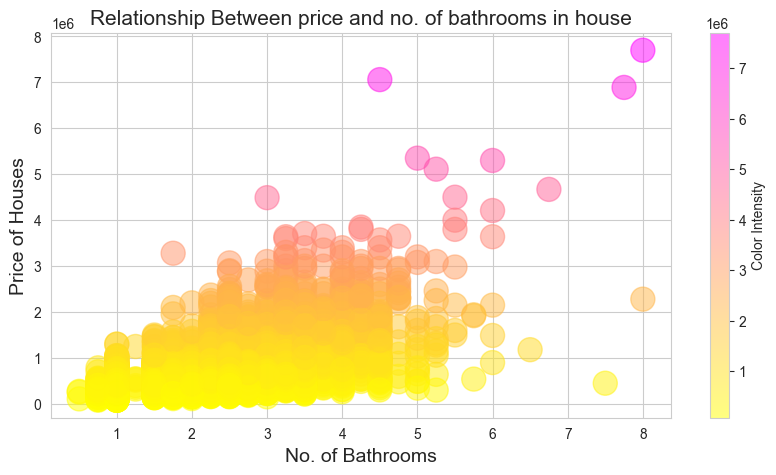

In [74]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('No. of Bathrooms',fontsize=14)
ax1.set_ylabel('Price of Houses',fontsize=14)
ax1.set_title('Relationship Between price and no. of bathrooms in house',fontsize=15)

# Set the color inside the scatter method and adjust the 'alpha' to allow transparancy
plt.scatter(df['bathrooms'], 
            df['price'], 
            c = df['price'],
            cmap = 'spring_r', # try removing '_r' from the end of the cmap name
            s = 300, 
            alpha = 0.5) 
cbar = plt.colorbar()
cbar.set_label('Color Intensity')

# we can say that no. of bathrooms have positive correlation with the average Prices of houses.

#### Hypothesis 3 - prices are dependent on no. of bedrooms and bathrooms 

### Recommendations for Stakeholders

In [76]:
df['zip_type'].value_counts()

country_side    12018
city_centre      5371
Name: zip_type, dtype: int64

In [77]:
df.groupby('bathrooms').mean()['price']

#for bathrooms less than 2, average house price is 454915.802

bathrooms
0.500    212333.333
0.750    312858.071
1.000    346888.909
1.250    561564.286
1.500    408851.268
1.750    455187.569
2.000    455724.187
2.250    530788.380
2.500    554059.870
2.750    654670.142
3.000    708751.548
3.250    964807.602
3.500    927362.411
3.750   1211388.916
4.000   1282292.955
4.250   1584725.373
4.500   1383483.275
4.750   2081883.333
5.000   1582343.750
5.250   1817961.538
5.500   2932857.143
5.750   1466666.667
6.000   2948333.333
6.500   1180000.000
6.750   4670000.000
7.500    450000.000
7.750   6890000.000
8.000   4990000.000
Name: price, dtype: float64

In [78]:
df_plz = df.query('zip_type == "city_centre"')
df_plz.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,zip_type,year_sold,month_sold,weekday_sold,day_sold,price_group
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,47.721,-122.319,1690,7639,city_centre,2014,12,1,9,500k-750k
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,47.521,-122.393,1360,5000,city_centre,2014,12,1,9,500k-750k
11,9212900260,2014-05-27,468000.000,2,1.000,1160,6000,1.000,0.000,0.000,...,47.690,-122.292,1330,6000,city_centre,2014,5,1,27,250k-500k
14,1175000570,2015-03-12,530000.000,5,2.000,1810,4850,1.500,0.000,0.000,...,47.670,-122.394,1360,4850,city_centre,2015,3,3,12,500k-750k
15,9297300055,2015-01-24,650000.000,4,3.000,2950,5000,2.000,0.000,3.000,...,47.571,-122.375,2140,4000,city_centre,2015,1,5,24,500k-750k


### Recommendations

1. The stakeholder is interested in houses in city house with central location and 1 in countryside
2. the house price in central location are higher than houses in country side.
3. House prices are also dependent on no. of Bedrooms and bathrooms, so he should go for bedroom with max no. 2 and bathrooms less than 2.
4. For Country side he should consider houses with bedrooms between 3 to 6 and bathrooms from 2 to 3
5. Best timing to buy houses is february

In [79]:
#The stakeholder is interested in houses in city house with central location
#the house for 2 people with upto 2 bedrooms and upto 2 bathrooms

df_2 = df.query('zip_type == "city_centre" and bedrooms < 3 and bathrooms < 2 and month_sold==2' )
df_2.head(3)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,zip_type,year_sold,month_sold,weekday_sold,day_sold,price_group
53,3626039271,2015-02-05,585000.000,2,1.750,1980,8550,1.000,0.000,0.000,...,47.699,-122.369,1480,6738,city_centre,2015,2,3,5,500k-750k
247,7899800890,2015-02-26,181000.000,2,1.500,720,5120,1.000,0.000,0.000,...,47.522,-122.357,1150,2566,city_centre,2015,2,3,26,0-250k
308,7171200445,2015-02-28,550700.000,2,1.000,1010,5000,1.500,0.000,0.000,...,47.669,-122.297,1460,5000,city_centre,2015,2,5,28,500k-750k


In [80]:
df_2.shape

(66, 27)

In [81]:
#generating map
King_County_map = folium.Map(location = [47.5, -122.2], zoom_start = 10)
King_County_map 


#instantiate a feature group for the houses in the dataframe
incidents = folium.map.FeatureGroup()
#incidents = plugins.MarkerCluster().add_to(King_County_map)
#loop through the 100 crimes and add each to the incidents feature group
for lat, long, in zip(df_2.lat, df_2.long):
 incidents.add_child(
 folium.features.CircleMarker(
 [lat, long],
 radius=5, # define how big you want the circle markers to be
 color='yellow', 
     fill=True,
     fill_color='blue',
     fill_opacity=0.6)
 )


# add pop-up text to each marker on the map
latitudes = list(df_2.lat)
longitudes = list(df_2.long)
labels = list(df_2.bedrooms)
for lat, long, label in zip(latitudes, longitudes,labels):
 folium.Marker([lat, long],popup=label).add_to(King_County_map) 
 
# add incidents to map
King_County_map.add_child(incidents)


In [82]:
#df_3 = df.drop(columns = ['id', 'date', 'sqft_living','sqft_lot', 'waterfront','sqft_living15','sqft_lot15'])
df_3 = df.query('zip_type == "country_side" and yr_renovated == 0.0 and month_sold == 2 and 3 < bedrooms < 6 and 2<= bathrooms <= 3' )
df_3 = df_3.drop(columns = ['id', 'date', 'sqft_living','sqft_lot', 'waterfront','sqft_living15','sqft_lot15'])
df_3.head(3)



,price,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,zip_type,year_sold,month_sold,weekday_sold,day_sold,price_group
51,345000.000,5,2.500,1.000,0.000,4,8,1640,1510.0,1966,0.000,98056,47.493,-122.189,country_side,2015,2,1,17,250k-500k
59,430000.000,4,3.000,2.000,0.000,3,8,1850,0.0,1991,0.000,98059,47.506,-122.149,country_side,2015,2,0,23,250k-500k
144,500000.000,4,2.250,1.000,0.000,4,8,1380,650.0,1961,0.000,98006,47.550,-122.174,country_side,2015,2,4,27,250k-500k


In [83]:
df_3.shape

(183, 20)

In [84]:
#generating map
King_County_map = folium.Map(location = [47.5, -122.2], zoom_start = 10)
King_County_map 


#instantiate a feature group for the houses in the dataframe
incidents = folium.map.FeatureGroup()
#incidents = plugins.MarkerCluster().add_to(King_County_map)
#loop through the 100 crimes and add each to the incidents feature group
for lat, long, in zip(df_3.lat, df_3.long):
 incidents.add_child(
 folium.features.CircleMarker(
 [lat, long],
 radius=5, # define how big you want the circle markers to be
 color='yellow', 
     fill=True,
     fill_color='green',
     fill_opacity=0.6)
 )


# add pop-up text to each marker on the map
latitudes = list(df_3.lat)
longitudes = list(df_3.long)
labels = list(df_3.bedrooms)
for lat, long, label in zip(latitudes, longitudes,labels):
 folium.Marker([lat, long],popup=label).add_to(King_County_map) 
 
# add incidents to map
King_County_map.add_child(incidents)